In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

# Defining a function that evaluates the model

In [2]:
param_matrix=pd.DataFrame(np.zeros((5,9)),columns=[['Model','RMSE_train','RMSE_test','MAE_train','MAE_test','R2_score_train','R2_score_test','Adjusted_R2_score_train','Adjusted_R2_score_test']])   
param_matrix_cox=pd.DataFrame(np.zeros((5,9)),columns=[['Model','RMSE_train','RMSE_test','MAE_train','MAE_test','R2_score_train','R2_score_test','Adjusted_R2_score_train','Adjusted_R2_score_test']])                                                                               

In [3]:
def model_evaluate(n,b, model, x_train, y_train, x_test, y_test):
                          
    mod=model()
    mod=mod.fit(x_train,y_train)
    y_pred_train=mod.predict(x_train)
    y_pred_test=mod.predict(x_test)
    
    print('\n','X-'*10,'EVALUATION OF',mod,' model','X-'*10)
                          
    print('\n\n','-'*30,'TRAINING SET','-'*30)
    print(f'\nRMSE: {np.sqrt(mean_squared_error(y_train,y_pred_train))}')
    print(f'MAE: {mean_absolute_error(y_train,y_pred_train)}')
    print(f'R2 Score: {r2_score(y_train,y_pred_train)}')
    a=sm.add_constant(x_train)
    r=sm.OLS(y_train,a).fit()
    print(f'Adjusted R square: {r.rsquared_adj}')
                          
    print('\n','-'*30,'TESTING SET','-'*30)
    print(f'\nRMSE: {np.sqrt(mean_squared_error(y_test,y_pred_test))}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred_test)}')
    print(f'R2 Score: {r2_score(y_test,y_pred_test)}')
    a1=sm.add_constant(x_test)
    r1=sm.OLS(y_test,a1).fit()
    print(f'Adjusted R square: {r1.rsquared_adj}')
    
    if y_test.shape!=y_pred_test.shape:
        y_pred_test=y_pred_test.reshape(y_test.shape)
    
    if b==0:
        param_matrix.loc[n,'Model']=str(mod)
        param_matrix.loc[n,'RMSE_train']=np.sqrt(mean_squared_error(y_train,y_pred_train))
        param_matrix.loc[n,'RMSE_test']=np.sqrt(mean_squared_error(y_test,y_pred_test))
        param_matrix.loc[n,'MAE_train']=mean_absolute_error(y_train,y_pred_train)
        param_matrix.loc[n,'MAE_test']=mean_absolute_error(y_test,y_pred_test)
        param_matrix.loc[n,'R2_score_train']=r2_score(y_train,y_pred_train)
        param_matrix.loc[n,'R2_score_test']=r2_score(y_test,y_pred_test)
        param_matrix.loc[n,'Adjusted_R2_score_train']=r.rsquared_adj
        param_matrix.loc[n,'Adjusted_R2_score_test']=r1.rsquared_adj
    if b==1:
        param_matrix_cox.loc[n,'Model']=mod
        param_matrix_cox.loc[n,'RMSE_train']=np.sqrt(mean_squared_error(y_train,y_pred_train))
        param_matrix_cox.loc[n,'RMSE_test']=np.sqrt(mean_squared_error(y_test,y_pred_test))
        param_matrix_cox.loc[n,'MAE_train']=mean_absolute_error(y_train,y_pred_train)
        param_matrix_cox.loc[n,'MAE_test']=mean_absolute_error(y_test,y_pred_test)
        param_matrix_cox.loc[n,'R2_score_train']=r2_score(y_train,y_pred_train)
        param_matrix_cox.loc[n,'R2_score_test']=r2_score(y_test,y_pred_test)
        param_matrix_cox.loc[n,'Adjusted_R2_score_train']=r.rsquared_adj
        param_matrix_cox.loc[n,'Adjusted_R2_score_test']=r1.rsquared_adj
                          
    print('\n','-'*30,'RESIDUAL PLOTS','-'*30)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.distplot(y_test-y_pred_test)
    plt.title('Error distribution')
    plt.xlabel('Errors')
                          
    plt.subplot(1,2,2)
    plt.scatter(y_pred_test,y_test-y_pred_test) # predicted value vs residue for checking Homoscedasticity
    plt.xlabel('Predicted value')
    plt.ylabel('Residue')
    plt.title('Predicted vs Residue')
    plt.tight_layout()
    

In [4]:
x_train=pd.read_csv('x_train_out.csv',index_col=0)
x_test=pd.read_csv('x_test_out.csv',index_col=0)
y_train=pd.read_csv('y_train_out.csv',index_col=0)
y_test=pd.read_csv('y_test_out.csv',index_col=0)
y_test.reset_index(inplace=True,drop=True)

In [5]:
x_train_cox=pd.read_csv('x_train_cox.csv',index_col=0)
x_test_cox=pd.read_csv('x_test_cox.csv',index_col=0)
y_train_cox=pd.read_csv('y_train_cox.csv',index_col=0)
y_test_cox=pd.read_csv('y_test_cox.csv',index_col=0)
y_test_cox.reset_index(inplace=True,drop=True)

# 1. Linear Regression


 X-X-X-X-X-X-X-X-X-X- EVALUATION OF LinearRegression()  model X-X-X-X-X-X-X-X-X-X-


 ------------------------------ TRAINING SET ------------------------------

RMSE: 109841.41210025577
MAE: 70842.20263167468
R2 Score: 0.9630817155627436
Adjusted R square: 0.9625590469782676

 ------------------------------ TESTING SET ------------------------------

RMSE: 117989.08103715842
MAE: 73863.37886720811
R2 Score: 0.957803950156088
Adjusted R square: 0.9582253127275254

 ------------------------------ RESIDUAL PLOTS ------------------------------


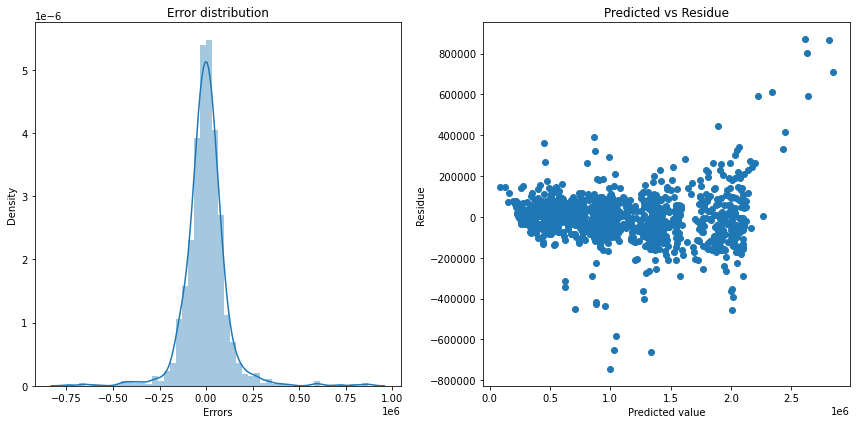

In [6]:
model_evaluate(0,0,LinearRegression,x_train, y_train, x_test, y_test)


 X-X-X-X-X-X-X-X-X-X- EVALUATION OF LinearRegression()  model X-X-X-X-X-X-X-X-X-X-


 ------------------------------ TRAINING SET ------------------------------

RMSE: 110623.21240470343
MAE: 71312.63424528798
R2 Score: 0.9616442812183323
Adjusted R square: 0.9611253954178199

 ------------------------------ TESTING SET ------------------------------

RMSE: 109661.09665615612
MAE: 70782.44587773865
R2 Score: 0.9619519603935076
Adjusted R square: 0.9631214946531416

 ------------------------------ RESIDUAL PLOTS ------------------------------


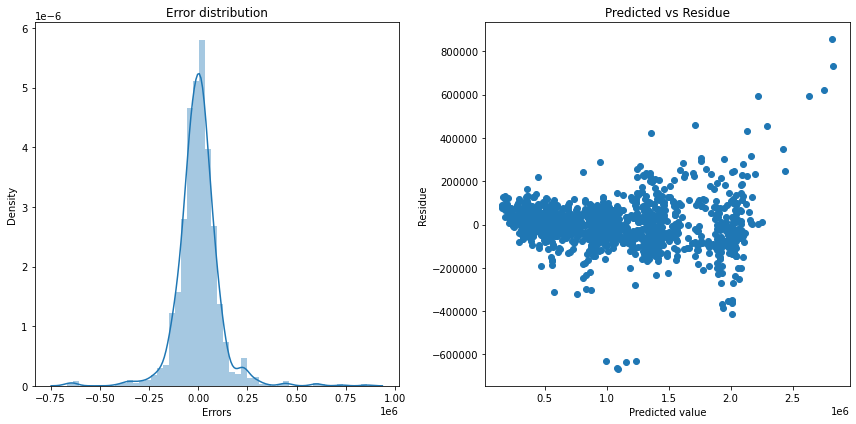

In [7]:
model_evaluate(0,1,LinearRegression,x_train_cox, y_train_cox, x_test_cox, y_test_cox)

# 2. Lasso Regression


 X-X-X-X-X-X-X-X-X-X- EVALUATION OF Lasso()  model X-X-X-X-X-X-X-X-X-X-


 ------------------------------ TRAINING SET ------------------------------

RMSE: 109834.79746872085
MAE: 70861.62524168406
R2 Score: 0.963086161854737
Adjusted R square: 0.9625590469782676

 ------------------------------ TESTING SET ------------------------------

RMSE: 117964.84774785339
MAE: 73874.51705386846
R2 Score: 0.9578212813203931
Adjusted R square: 0.9582253127275254

 ------------------------------ RESIDUAL PLOTS ------------------------------


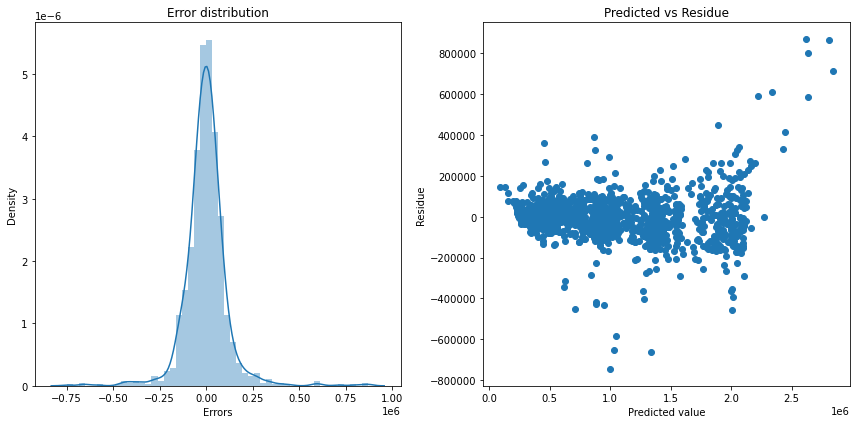

In [8]:
model_evaluate(1,0,Lasso,x_train, y_train, x_test, y_test)


 X-X-X-X-X-X-X-X-X-X- EVALUATION OF Lasso()  model X-X-X-X-X-X-X-X-X-X-


 ------------------------------ TRAINING SET ------------------------------

RMSE: 110576.37489403572
MAE: 71188.82388920887
R2 Score: 0.9616767537172826
Adjusted R square: 0.9611253954178199

 ------------------------------ TESTING SET ------------------------------

RMSE: 109435.37590884525
MAE: 70618.3662481085
R2 Score: 0.9621084314376316
Adjusted R square: 0.9631214946531416

 ------------------------------ RESIDUAL PLOTS ------------------------------


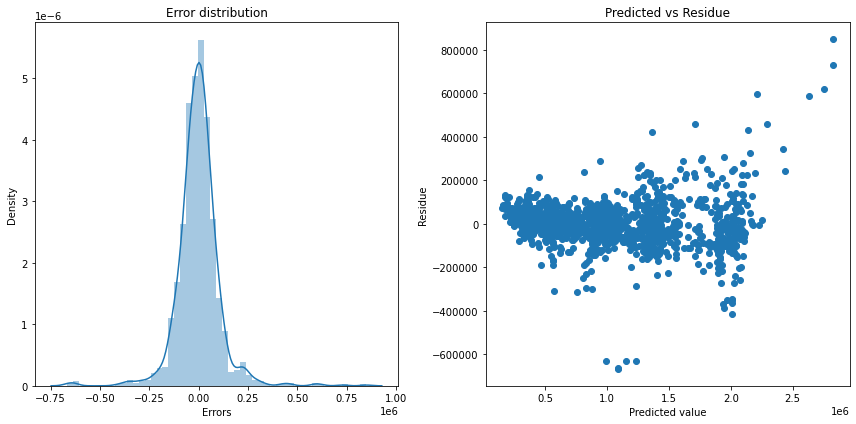

In [9]:
model_evaluate(1,1,Lasso,x_train_cox, y_train_cox, x_test_cox, y_test_cox)

# 3. Ridge Regression


 X-X-X-X-X-X-X-X-X-X- EVALUATION OF Ridge()  model X-X-X-X-X-X-X-X-X-X-


 ------------------------------ TRAINING SET ------------------------------

RMSE: 109835.5630581741
MAE: 70833.86521453483
R2 Score: 0.9630856472465381
Adjusted R square: 0.9625590469782676

 ------------------------------ TESTING SET ------------------------------

RMSE: 117967.17533569141
MAE: 73837.8775579688
R2 Score: 0.9578196168306227
Adjusted R square: 0.9582253127275254

 ------------------------------ RESIDUAL PLOTS ------------------------------


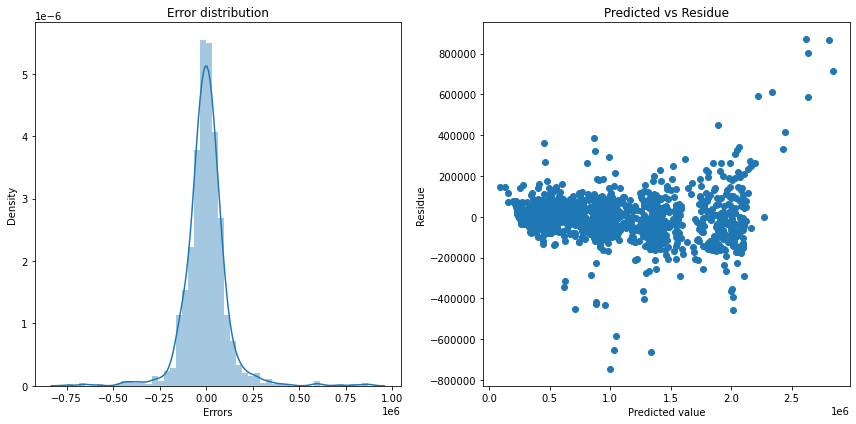

In [10]:
model_evaluate(2,0,Ridge,x_train, y_train, x_test, y_test)


 X-X-X-X-X-X-X-X-X-X- EVALUATION OF Ridge()  model X-X-X-X-X-X-X-X-X-X-


 ------------------------------ TRAINING SET ------------------------------

RMSE: 110577.14069203357
MAE: 71160.24292467578
R2 Score: 0.9616762228992497
Adjusted R square: 0.9611253954178199

 ------------------------------ TESTING SET ------------------------------

RMSE: 109446.11891257318
MAE: 70594.5665507084
R2 Score: 0.962100991626886
Adjusted R square: 0.9631214946531416

 ------------------------------ RESIDUAL PLOTS ------------------------------


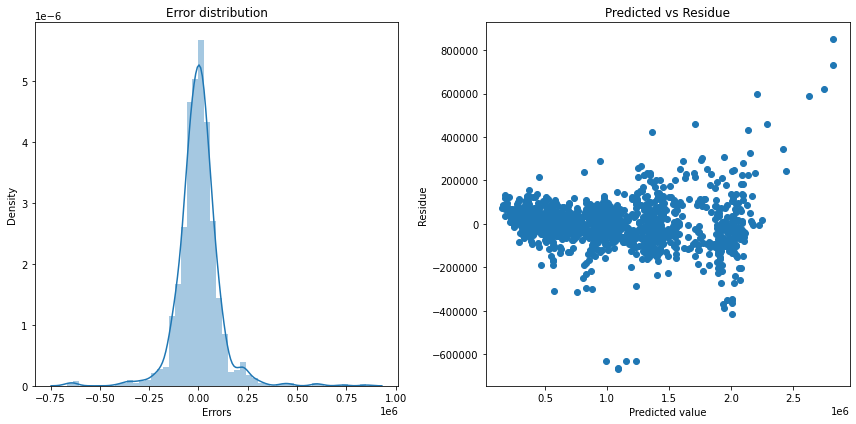

In [11]:
model_evaluate(2,1,Ridge,x_train_cox, y_train_cox, x_test_cox, y_test_cox)

# 4. Elastic net regression


 X-X-X-X-X-X-X-X-X-X- EVALUATION OF ElasticNet()  model X-X-X-X-X-X-X-X-X-X-


 ------------------------------ TRAINING SET ------------------------------

RMSE: 222295.61567505382
MAE: 177118.6052547865
R2 Score: 0.8487932805969619
Adjusted R square: 0.9625590469782676

 ------------------------------ TESTING SET ------------------------------

RMSE: 228450.56309676138
MAE: 175835.26884443642
R2 Score: 0.8418123314847639
Adjusted R square: 0.9582253127275254

 ------------------------------ RESIDUAL PLOTS ------------------------------


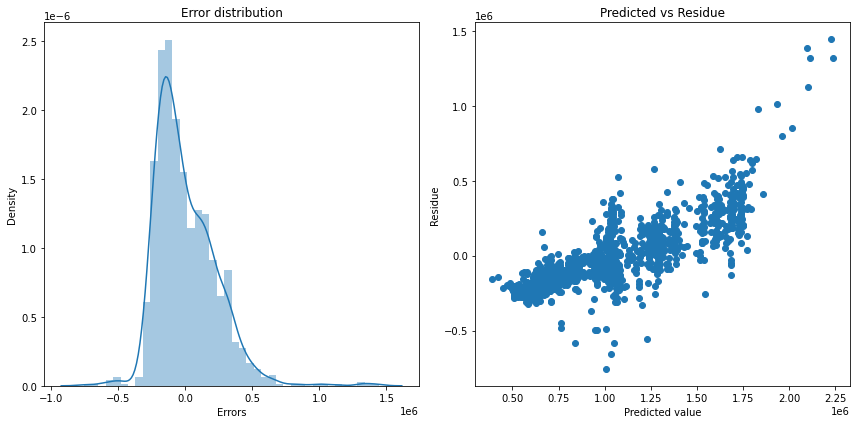

In [12]:
model_evaluate(3,0,ElasticNet,x_train, y_train, x_test, y_test)


 X-X-X-X-X-X-X-X-X-X- EVALUATION OF ElasticNet()  model X-X-X-X-X-X-X-X-X-X-


 ------------------------------ TRAINING SET ------------------------------

RMSE: 220732.67502886403
MAE: 174882.27619802198
R2 Score: 0.8472888150583748
Adjusted R square: 0.9611253954178199

 ------------------------------ TESTING SET ------------------------------

RMSE: 220414.9011032499
MAE: 173482.85070618085
R2 Score: 0.8462875592094325
Adjusted R square: 0.9631214946531416

 ------------------------------ RESIDUAL PLOTS ------------------------------


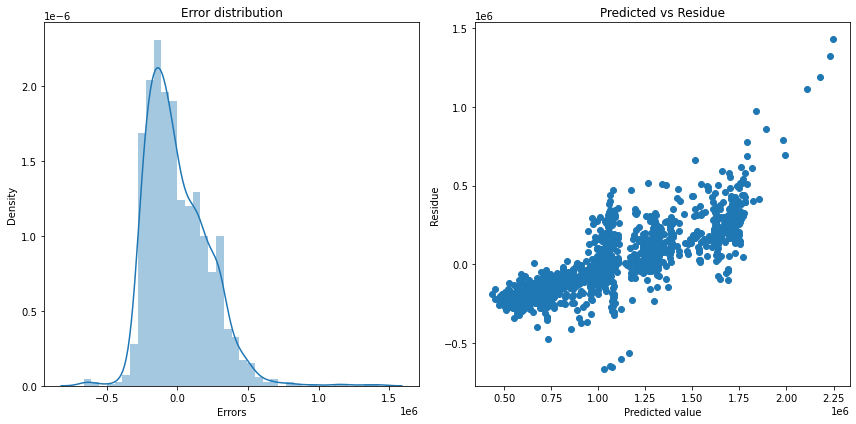

In [13]:
model_evaluate(3,1,ElasticNet,x_train_cox, y_train_cox, x_test_cox, y_test_cox)

# 5. Polynomial regression

**Check the degree of which polynomial to fit**

In [14]:
''''train_error=[]
test_error=[]
def polynomial_eval(x_train,x_test,y_train,y_test):
    for i in range(2,4):
        poly=PolynomialFeatures(degree=i)
        poly.fit(x_train,y_train)
        x_train=poly.fit_transform(x_train).astype('int')
        x_test=poly.fit_transform(x_test).astype('int')
        linreg=LinearRegression()
        linreg.fit(x_train,y_train)
        test_pred=linreg.predict(x_test)
        train_pred=linreg.predict(x_train)
        train_error.append(np.sqrt(mean_squared_error(y_train,train_pred)))
        test_error.append(np.sqrt(mean_squared_error(y_test,test_pred)))
        
    plt.plot(range(2,3),train_error,label='Train Error')
    plt.plot(range(2,3),test_error,label='Test Error')
    plt.xlabel('Degree')
    plt.ylabel('RMSE')
    plt.grid()
    plt.legend()  '''''

"'train_error=[]\ntest_error=[]\ndef polynomial_eval(x_train,x_test,y_train,y_test):\n    for i in range(2,4):\n        poly=PolynomialFeatures(degree=i)\n        poly.fit(x_train,y_train)\n        x_train=poly.fit_transform(x_train).astype('int')\n        x_test=poly.fit_transform(x_test).astype('int')\n        linreg=LinearRegression()\n        linreg.fit(x_train,y_train)\n        test_pred=linreg.predict(x_test)\n        train_pred=linreg.predict(x_train)\n        train_error.append(np.sqrt(mean_squared_error(y_train,train_pred)))\n        test_error.append(np.sqrt(mean_squared_error(y_test,test_pred)))\n        \n    plt.plot(range(2,3),train_error,label='Train Error')\n    plt.plot(range(2,3),test_error,label='Test Error')\n    plt.xlabel('Degree')\n    plt.ylabel('RMSE')\n    plt.grid()\n    plt.legend()  "


 X-X-X-X-X-X-X-X-X-X- EVALUATION OF LinearRegression()  model X-X-X-X-X-X-X-X-X-X-


 ------------------------------ TRAINING SET ------------------------------

RMSE: 49713.54671835281
MAE: 33482.83732563025
R2 Score: 0.9924376148359884
Adjusted R square: 0.9900329482113012

 ------------------------------ TESTING SET ------------------------------

RMSE: 4.6384815585947736e+16
MAE: 6498189505676537.0
R2 Score: -6.521384816843231e+21
Adjusted R square: 0.9874356188841401

 ------------------------------ RESIDUAL PLOTS ------------------------------


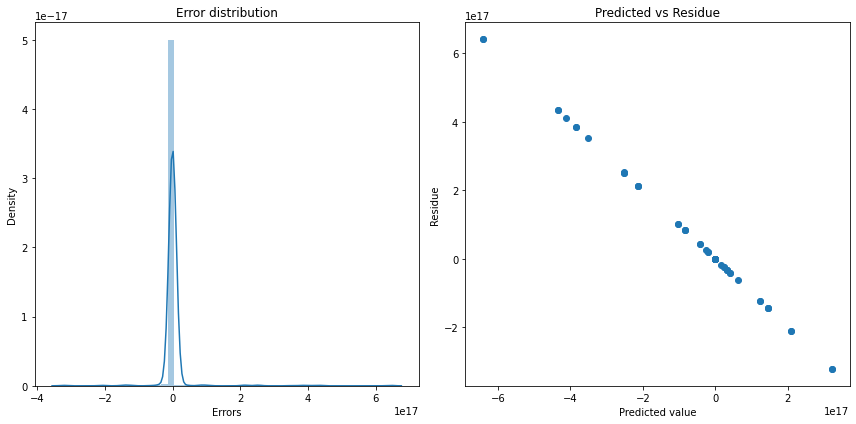

In [15]:
poly=PolynomialFeatures(degree=2)
model_evaluate(4,0,LinearRegression, poly.fit_transform(x_train), y_train,poly.fit_transform(x_test), y_test)


 X-X-X-X-X-X-X-X-X-X- EVALUATION OF LinearRegression()  model X-X-X-X-X-X-X-X-X-X-


 ------------------------------ TRAINING SET ------------------------------

RMSE: 49889.25651948188
MAE: 34870.07722416473
R2 Score: 0.9921989752137823
Adjusted R square: 0.9902894398973756

 ------------------------------ TESTING SET ------------------------------

RMSE: 1.2562638687551758e+17
MAE: 1.5955726401733496e+16
R2 Score: -4.993313736001955e+22
Adjusted R square: 0.988051452106637

 ------------------------------ RESIDUAL PLOTS ------------------------------


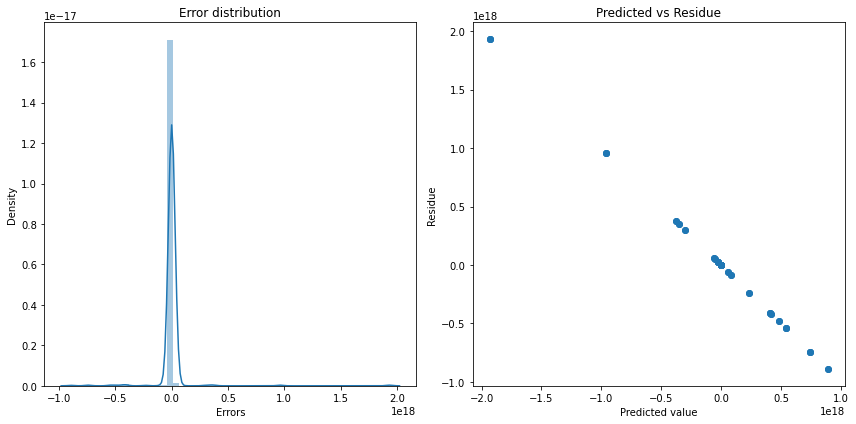

In [16]:
poly=PolynomialFeatures(degree=2)
model_evaluate(4,1,LinearRegression, poly.fit_transform(x_train_cox), y_train_cox,poly.fit_transform(x_test_cox), y_test_cox)

# Comparing metrics

In [20]:
param_matrix.iloc[4,0]='Polynomial Regression()'

In [21]:
param_matrix_cox.iloc[4,0]='Polynomial Regression()'

In [22]:
param_matrix

,Model,RMSE_train,RMSE_test,MAE_train,MAE_test,R2_score_train,R2_score_test,Adjusted_R2_score_train,Adjusted_R2_score_test
0,LinearRegression(),109841.412100,1.179891e+05,70842.202632,7.386338e+04,0.963082,9.578040e-01,0.962559,0.958225
1,Lasso(),109834.797469,1.179648e+05,70861.625242,7.387452e+04,0.963086,9.578213e-01,0.962559,0.958225
2,Ridge(),109835.563058,1.179672e+05,70833.865215,7.383788e+04,0.963086,9.578196e-01,0.962559,0.958225
3,ElasticNet(),222295.615675,2.284506e+05,177118.605255,1.758353e+05,0.848793,8.418123e-01,0.962559,0.958225
4,Polynomial Regression(),49713.546718,4.638482e+16,33482.837326,6.498190e+15,0.992438,-6.521385e+21,0.990033,0.987436


In [23]:
param_matrix_cox

,Model,RMSE_train,RMSE_test,MAE_train,MAE_test,R2_score_train,R2_score_test,Adjusted_R2_score_train,Adjusted_R2_score_test
0,LinearRegression(),110623.212405,1.096611e+05,71312.634245,7.078245e+04,0.961644,9.619520e-01,0.961125,0.963121
1,Lasso(),110576.374894,1.094354e+05,71188.823889,7.061837e+04,0.961677,9.621084e-01,0.961125,0.963121
2,Ridge(),110577.140692,1.094461e+05,71160.242925,7.059457e+04,0.961676,9.621010e-01,0.961125,0.963121
3,ElasticNet(),220732.675029,2.204149e+05,174882.276198,1.734829e+05,0.847289,8.462876e-01,0.961125,0.963121
4,Polynomial Regression(),49889.256519,1.256264e+17,34870.077224,1.595573e+16,0.992199,-4.993314e+22,0.990289,0.988051


# Conclusion

Comparing the RMSE and R2 scores of train and test models of both entries, simple linear regression, Lasso and Ridge regression models' metrics are comparable in both cases. Errors in these cases were normally distributed and heteroskedacticity is less. Polynomial regression has overfit the data. There is a problem of underfitting with Elastic Net. 